# Tutorial 31: Hierarchical Portfolios with Custom Covariance

## 1. Downloading the data:

| 티커       | 이름                               | 설명                                                                                         | 거래소              |
|------------|------------------------------------|----------------------------------------------------------------------------------------------|---------------------|
| IEUR       | iShares MSCI Europe ETF            | 유럽 시장에 투자하는 ETF로, MSCI Europe Index를 추종합니다.                                  | NYSE Arca           |
| IPAC       | iShares MSCI Pacific ETF           | 아시아-태평양 지역에 투자하는 ETF로, MSCI Pacific IMI Index를 추종합니다.                    | NYSE Arca           |
| IVV        | iShares Core S&P 500 ETF           | S&P 500 Index를 추종하는 ETF로, 미국 대형주에 투자합니다.                                   | NYSE Arca           |
| EWC        | iShares MSCI Canada ETF            | 캐나다 시장에 투자하는 ETF로, MSCI Canada Index를 추종합니다.                                | NYSE Arca           |
| SCZ        | iShares MSCI EAFE Small-Cap ETF    | 선진국 소형주 시장에 투자하는 ETF로, MSCI EAFE Small Cap Index를 추종합니다.                 | NYSE Arca           |
| IJR        | iShares Core S&P Small-Cap ETF     | S&P SmallCap 600 Index를 추종하는 ETF로, 미국 소형주에 투자합니다.                           | NYSE Arca           |
| XCS.TO     | iShares S&P/TSX SmallCap Index ETF | 캐나다 소형주 시장에 투자하는 ETF로, S&P/TSX SmallCap Index를 추종합니다.                    | Toronto Stock Exchange |
| EIMI.L     | iShares MSCI EM IMI ETF            | 신흥 시장에 투자하는 ETF로, MSCI Emerging Markets Investable Market Index를 추종합니다.      | London Stock Exchange  |


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets =  ['IEUR', 'IPAC', 'IVV', 'EWC', 'SCZ', 'IJR', 'XCS.TO', 'EIMI.L']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  8 of 8 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,EIMI.L,EWC,IEUR,IJR,IPAC,IVV,SCZ,XCS.TO
Date,,,,,,,,
2016-01-05,0.8804%,-0.4719%,-0.6498%,0.3068%,0.5109%,0.2079%,-0.2627%,-0.2423%
2016-01-06,-1.1807%,-2.1811%,-1.7442%,-1.1402%,-1.9695%,-1.3092%,-1.6819%,-0.6478%
2016-01-07,-1.9740%,-2.3752%,-1.6741%,-2.5694%,-2.0955%,-2.3927%,-1.5251%,-2.4450%
2016-01-08,-2.0668%,-0.4468%,-1.0556%,-1.6651%,-1.4784%,-1.1077%,-1.3395%,0.0835%
2016-01-11,-0.7576%,-1.3466%,0.1520%,0.0098%,0.1792%,0.1037%,0.1697%,-3.6728%


In [3]:
# Load our custom estimates of input parameters

custom_cov = pd.read_excel('custom_posterior_cov.xlsx', engine='openpyxl', index_col=0)

display(custom_cov)

,IEUR,IPAC,IVV,EWC,SCZ,IJR,XCS.TO,EIMI.L
IEUR,3.6700%,2.3800%,3.7600%,3.6300%,3.2000%,4.4600%,3.8700%,2.3200%
IPAC,2.3800%,2.4000%,2.3500%,2.3100%,2.4000%,2.7900%,2.4200%,1.8100%
IVV,3.7600%,2.3500%,4.6400%,4.0700%,3.3000%,5.4800%,4.3800%,2.4200%
EWC,3.6300%,2.3100%,4.0700%,4.2300%,3.2600%,4.9500%,4.6000%,2.3400%
SCZ,3.2000%,2.4000%,3.3000%,3.2600%,3.0100%,4.0200%,3.5400%,2.1500%
IJR,4.4600%,2.7900%,5.4800%,4.9500%,4.0200%,6.6900%,5.4100%,2.8600%
XCS.TO,3.8700%,2.4200%,4.3800%,4.6000%,3.5400%,5.4100%,5.1700%,2.5700%
EIMI.L,2.3200%,1.8100%,2.4200%,2.3400%,2.1500%,2.8600%,2.5700%,2.2300%


이 표는 자산 간의 공분산 행렬을 나타냅니다. 공분산 행렬은 각 자산 쌍 간의 수익률 변동이 서로 어떻게 관련되어 있는지를 나타냅니다. 공분산 값이 클수록 두 자산의 수익률이 서로 많이 연동된다는 의미입니다.

### 주요 요소

1. **행과 열**: 각 자산 (IEUR, IPAC, IVV, EWC, SCZ, IJR, XCS.TO, EIMI.L)을 나타냅니다.
2. **셀 값**: 두 자산 간의 공분산을 퍼센트로 표시합니다. 예를 들어, IEUR와 IPAC 간의 공분산은 2.3800%입니다.

### 공분산 행렬의 의미

- **대각선 요소**: 각 자산의 분산을 나타냅니다. 예를 들어, IEUR의 분산은 3.6700%입니다.
- **비대각선 요소**: 서로 다른 두 자산 간의 공분산을 나타냅니다. 예를 들어, IEUR와 IPAC 간의 공분산은 2.3800%입니다.

### 사용 목적

공분산 행렬은 포트폴리오 최적화에서 중요한 역할을 합니다. 이를 통해 자산 간의 상관관계를 이해하고, 리스크를 최소화하면서 기대 수익률을 최대화하는 포트폴리오를 구성할 수 있습니다.


이 공분산 행렬을 사용하여 포트폴리오 최적화를 수행하면, 자산 간의 상관관계를 고려하여 리스크를 최소화할 수 있습니다. 공분산 행렬의 값을 분석하여 자산 간의 관계를 이해하고, 이를 기반으로 포트폴리오를 구성할 수 있습니다.

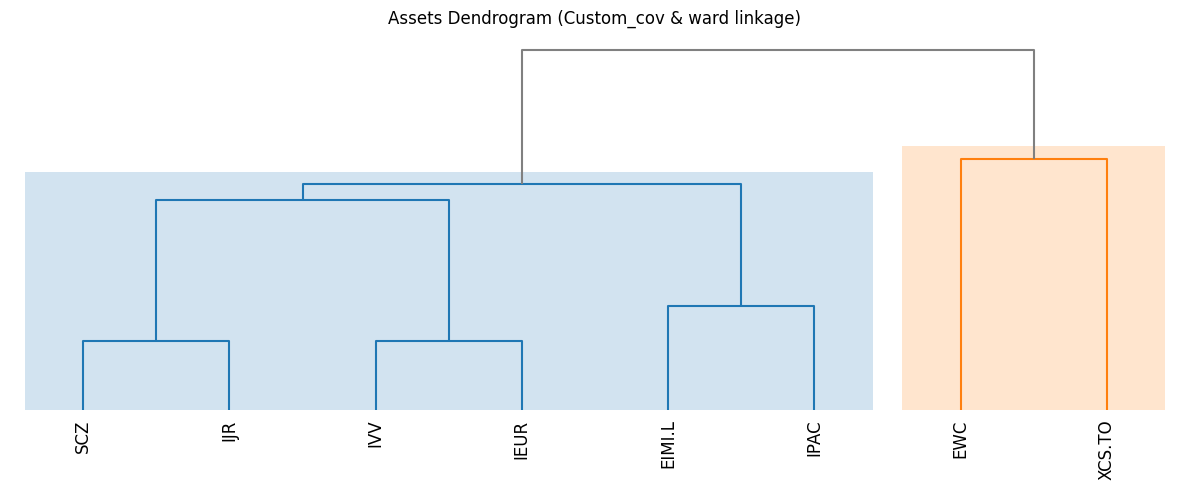

In [4]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=Y,
                        custom_cov=custom_cov,
                        codependence='custom_cov',
                        linkage='ward',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

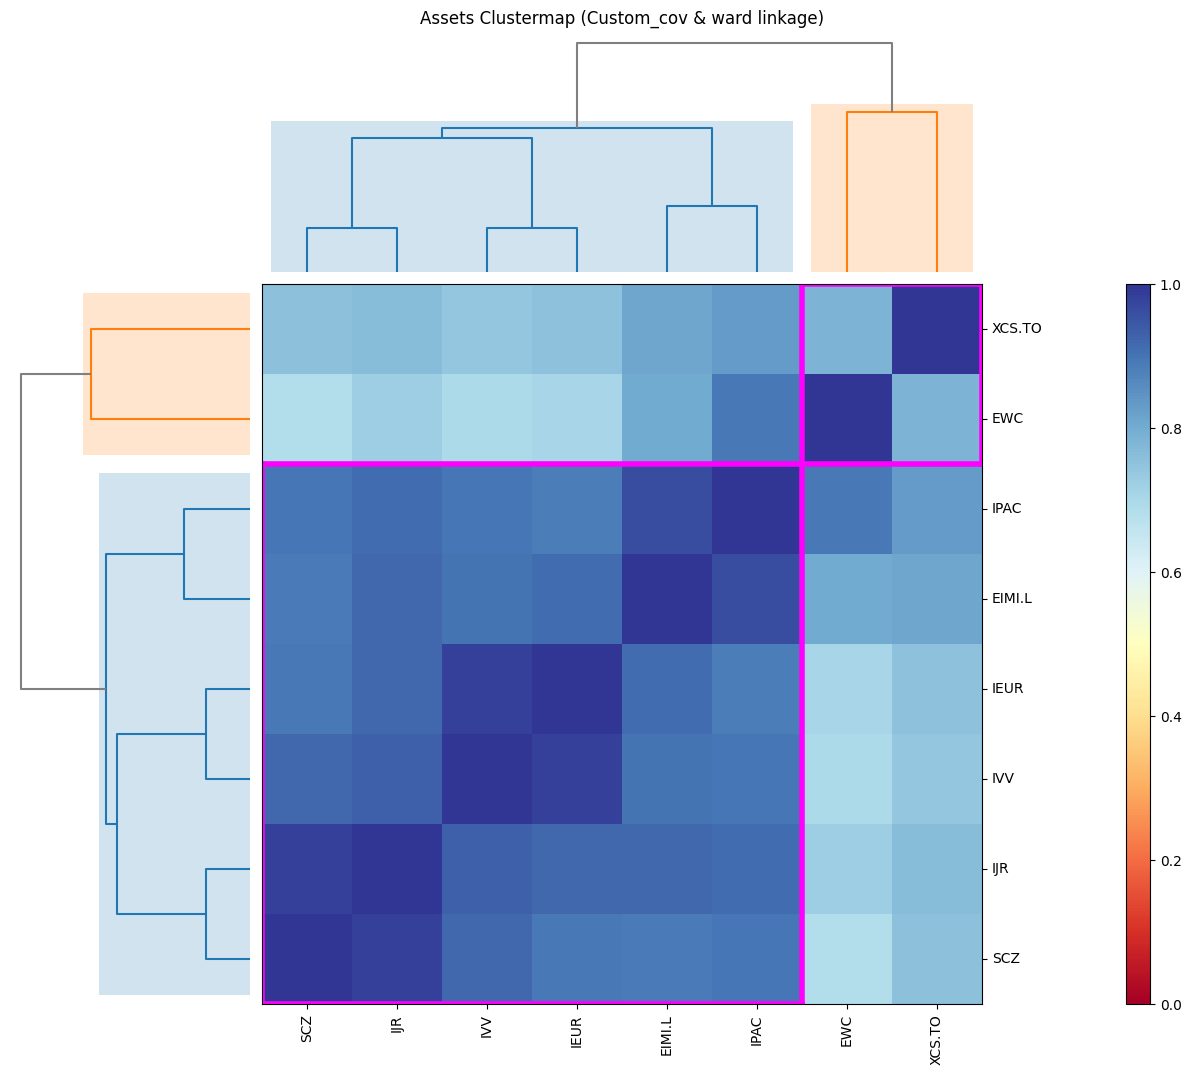

In [6]:
# Plotting Assets Clusters

ax = rp.plot_clusters(returns=Y,
                      custom_cov=custom_cov,
                      codependence='custom_cov',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

## 2. Estimating HERC Portfolio

### 2.1 Calculating the HERC portfolio

In [7]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HERC' # Could be HRP or HERC
codependence = 'custom_cov' # Correlation matrix used to group assets in clusters
method_cov = 'custom_cov'
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      method_cov=method_cov,
                      custom_cov=custom_cov,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,EIMI.L,EWC,IEUR,IJR,IPAC,IVV,SCZ,XCS.TO
weights,6.0651%,24.2092%,8.0571%,6.6584%,10.5345%,10.4578%,9.8277%,24.1902%


### 2.2 Plotting portfolio composition

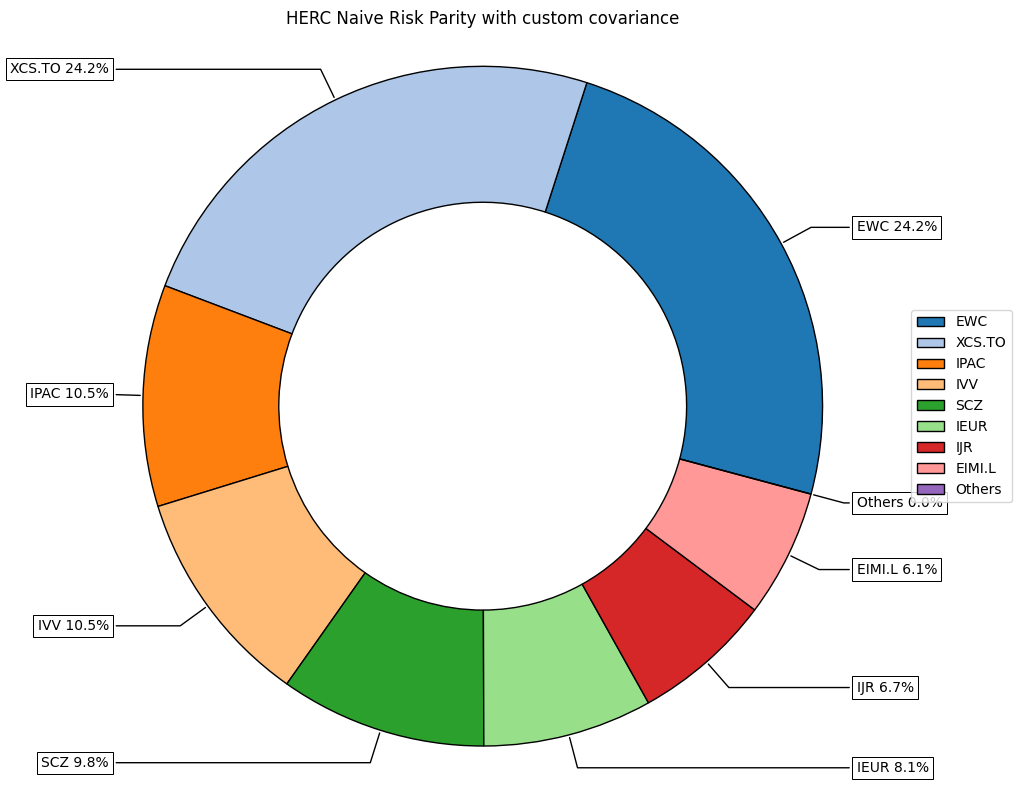

In [8]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HERC Naive Risk Parity with custom covariance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 2.3 Plotting Risk Contribution

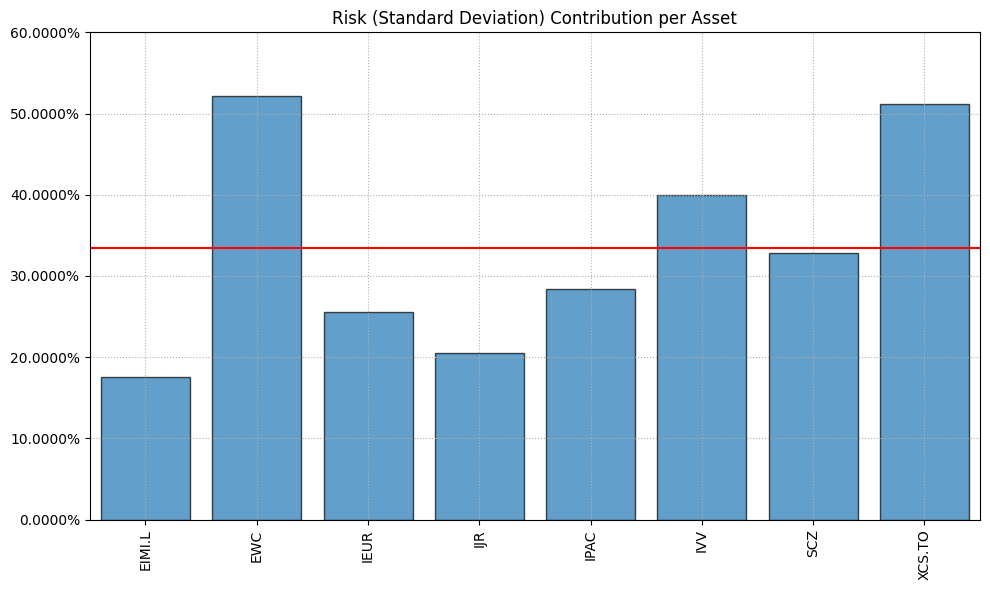

In [9]:
# Plotting the risk contribution per asset

ax = rp.plot_risk_con(w=w,
                      cov=custom_cov,
                      returns=Y,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

## 3. Estimating HERC Portfolio for Several Risk Measures

In [10]:
# Risk Measures available:
#
# 'vol': Standard Deviation.
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'VaR': Conditional Value at Risk.
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'DaR': Drawdown at Risk of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
# 'MDD_Rel': Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
# 'ADD_Rel': Average Drawdown of compounded cumulative returns.
# 'DaR_Rel': Drawdown at Risk of compounded cumulative returns.
# 'CDaR_Rel': Conditional Drawdown at Risk of compounded cumulative returns.
# 'EDaR_Rel': Entropic Drawdown at Risk of compounded cumulative returns.
# 'UCI_Rel': Ulcer Index of compounded cumulative returns.

rms = ['vol', 'MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'VaR','CVaR', 'EVaR', 'WR', 'MDD', 'ADD',
       'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel', 'ADD_Rel',
       'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          codependence=codependence,
                          method_cov=method_cov,
                          custom_cov=custom_cov,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [11]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MAD,MSV,FLPM,SLPM,VaR,CVaR,EVaR,WR,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
EIMI.L,7.14%,6.07%,6.81%,7.09%,6.79%,7.10%,6.64%,7.24%,7.79%,7.36%,8.02%,5.57%,5.96%,6.52%,7.15%,5.67%,7.94%,5.55%,5.90%,6.53%,7.09%,5.61%
EWC,24.65%,24.21%,24.54%,25.29%,24.58%,25.39%,25.51%,25.36%,29.11%,31.66%,25.14%,25.96%,26.34%,26.17%,25.71%,27.41%,25.39%,26.68%,27.11%,26.57%,26.07%,28.14%
IEUR,8.23%,8.06%,8.68%,7.82%,8.60%,7.75%,8.97%,8.01%,3.96%,2.93%,8.83%,8.00%,7.94%,8.05%,8.50%,8.17%,8.70%,7.73%,7.82%,8.01%,8.38%,7.99%
IJR,7.48%,6.66%,7.21%,7.54%,7.26%,7.59%,7.31%,7.69%,7.81%,7.16%,7.20%,8.99%,8.38%,8.02%,7.64%,8.36%,7.40%,8.89%,8.18%,7.99%,7.74%,8.26%
IPAC,9.41%,10.53%,9.34%,9.36%,9.34%,9.35%,9.68%,9.21%,8.71%,7.89%,9.92%,9.22%,9.37%,9.64%,9.90%,9.25%,9.61%,8.94%,9.13%,9.39%,9.58%,8.97%
IVV,9.37%,10.46%,10.09%,9.19%,10.53%,9.29%,9.16%,8.47%,8.54%,7.81%,10.70%,21.43%,15.75%,14.10%,12.57%,17.40%,10.43%,20.80%,15.02%,13.48%,12.20%,17.03%
SCZ,9.09%,9.83%,9.35%,8.69%,9.35%,8.65%,9.39%,8.73%,5.14%,3.86%,7.52%,7.02%,7.01%,7.12%,7.36%,6.91%,7.62%,7.06%,7.07%,7.22%,7.42%,6.94%
XCS.TO,24.64%,24.19%,23.99%,25.01%,23.55%,24.87%,23.35%,25.29%,28.95%,31.31%,22.66%,13.80%,19.25%,20.36%,21.18%,16.83%,22.90%,14.35%,19.77%,20.81%,21.51%,17.07%


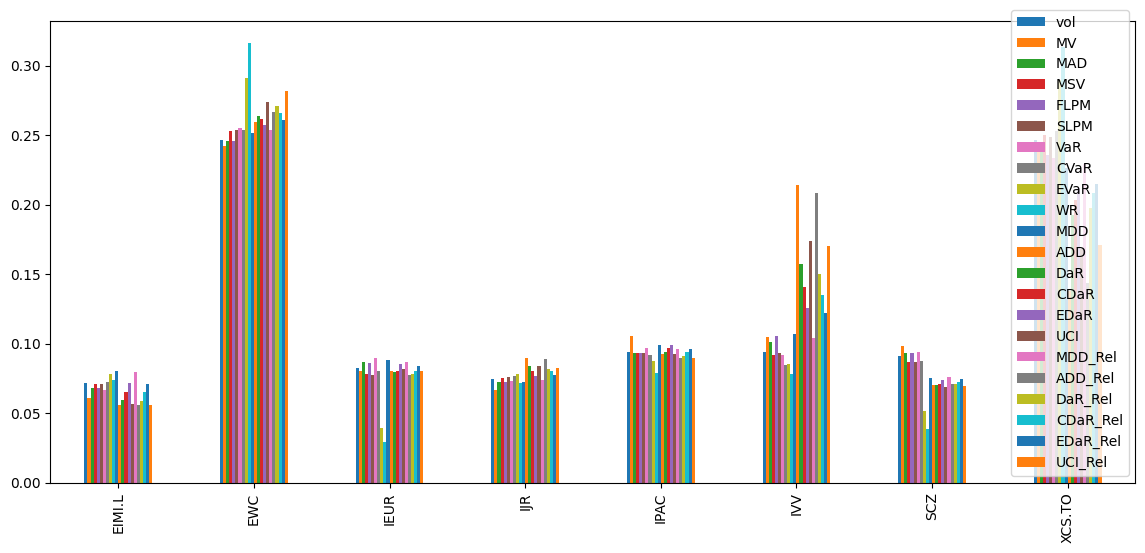

In [12]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)
plt.legend(loc='lower right')